# **Hoja de Trabajo 2**

Paula Barillas - 22764
Mónica Salvatierra - 22249

## **Link del Repositorio**

https://github.com/alee2602/HDT2-DM

### **Importar las librerías a utilizar**

In [52]:
import pandas as pd
#from pandas_profiling import ProfileReport   # para versiones Python < 3.11
from ydata_profiling import ProfileReport     # para versiones Python >= 3.11
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline


### **Leer archivo de datos**

In [53]:
data = pd.read_csv("iris.csv")

### **Obtener las primeros 10 observaciones**

In [54]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### **Verificar el tipo de variables que estamos tratando**

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**A partir de esta información, podemos decir lo siguiente:**

- No existen valores faltantes
- Las 4 variables son numéricas, por lo que no necesitamos codificarlas ni estandarizar el nombre de nuestras columnas

### **Obtener estadísticas de las variables**

In [56]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observamos que los valores no se encuentran muy dispersos, por lo que por el momento no consideramos necesario realizar una normalización de los datos.**

## **Sección 1**

**Visualizaremos los datos para verificar si se pueden distinguir algunos grupos**

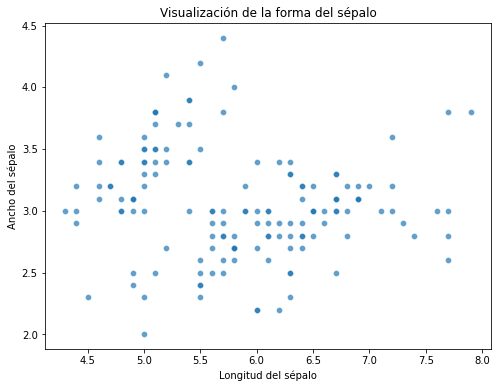

In [57]:
# Visualización de la forma del sépalo
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["sepal_length"], y=data["sepal_width"], alpha=0.7)
plt.xlabel("Longitud del sépalo")
plt.ylabel("Ancho del sépalo")
plt.title("Visualización de la forma del sépalo")
plt.show()


**A continuación se crearán 2 clusters por medio del algoritmo de K-Means Clustering**

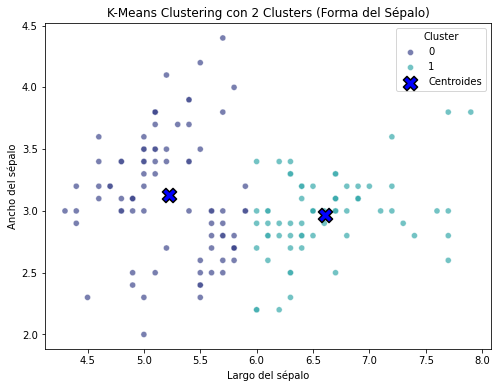

In [58]:

# Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data["cluster_2"] = kmeans.fit_predict(data[["sepal_length", "sepal_width"]])

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["sepal_length"], y=data["sepal_width"], hue=data["cluster_2"], palette="mako", alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, c="blue", edgecolors="black", linewidths=1.5, label="Centroides")  
plt.xlabel("Largo del sépalo")
plt.ylabel("Ancho del sépalo")
plt.title("K-Means Clustering con 2 Clusters (Forma del Sépalo)")
plt.legend(title="Cluster")
plt.show()

**Mostrar la cantidad de observaciones en cada cluster**

In [59]:

contador_cluster = data["cluster_2"].value_counts().sort_index()

print("Cantidad de puntos en cada cluster:")
print(contador_cluster)


Cantidad de puntos en cada cluster:
cluster_2
0    83
1    67
Name: count, dtype: int64


**Estandarizaremos los datos para verificar si existe alguna diferencia en los clusters**

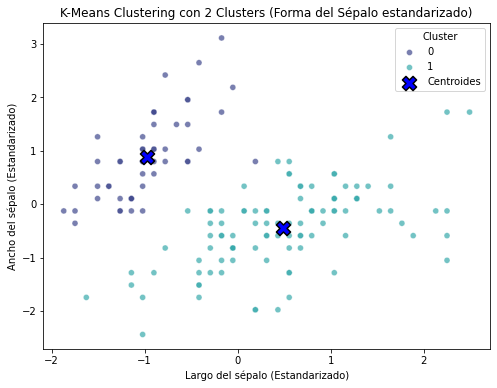

In [60]:

# Estandarizar los datos
scaler = StandardScaler()
standarized_data = data.copy()
standarized_data[["sepal_length", "sepal_width"]] = scaler.fit_transform(data[["sepal_length", "sepal_width"]])

# Aplicar K-Means nuevamente con datos estandarizados
kmeans_std = KMeans(n_clusters=2, random_state=42, n_init=10)
standarized_data["cluster_2"] = kmeans_std.fit_predict(standarized_data[["sepal_length", "sepal_width"]])

# Obtener los centroides 
centroids_std = kmeans_std.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=standarized_data["sepal_length"], y=standarized_data["sepal_width"], hue=standarized_data["cluster_2"], palette="mako", alpha=0.7)
plt.scatter(centroids_std[:, 0], centroids_std[:, 1], marker="X", s=200, c="blue", edgecolors="black", linewidths=1.5, label="Centroides")
plt.xlabel("Largo del sépalo (Estandarizado)")
plt.ylabel("Ancho del sépalo (Estandarizado)")
plt.title("K-Means Clustering con 2 Clusters (Forma del Sépalo estandarizado)")
plt.legend(title="Cluster")
plt.show()


**Mostrar la cantidad de observaciones en cada cluster**

In [61]:
# Contar la cantidad de puntos en cada cluster después de la estandarización
cluster_counts_std = standarized_data["cluster_2"].value_counts().sort_index()

print("Cantidad de puntos en cada cluster después de la estandarización:")
print(cluster_counts_std)


Cantidad de puntos en cada cluster después de la estandarización:
cluster_2
0     50
1    100
Name: count, dtype: int64


Sí, existe una diferencia en el cálculo de los clusters dependiendo de si los datos están escalados o no. La diferencia en la clasificación de las observaciones dentro de los clusters se debe al efecto que tiene la estandarización en los datos. Cuando los datos no están escalados, las variables pueden tener diferentes rangos de valores, lo que influye en la forma en que el algoritmo K-Means define cada uno de los grupos. En este caso, antes de la estandarización, el cluster 0 contenía 83 observaciones y el cluster 1 tenía 67 observaciones.

Sin embargo, al estandarizar los datos, se normalizan las escalas de las variables, permitiendo que todas contribuyan de manera equitativa al cálculo de distancias en el clustering. Como resultado, los centroides cambian de posición y la asignación de puntos a los clusters también varía. En este caso, tras la estandarización, el cluster 0 redujo su cantidad de observaciones a 50, mientras que el cluster 1 aumentó a 100 observaciones.

**Método del codo**

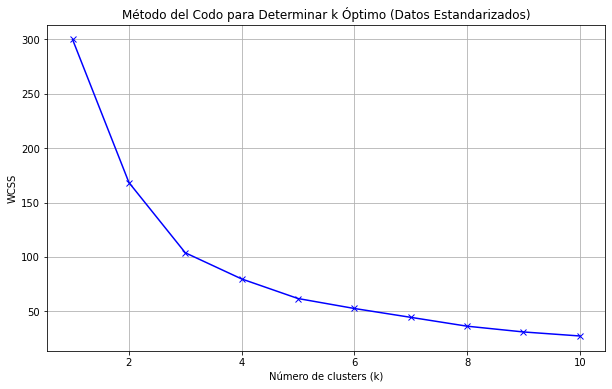

In [62]:

# Inicializar lista para almacenar los valores calculados para el WCSS
wcss = []

K = range(1, 11)

# Calcular WCSS para cada valor de k utilizando los datos estandarizados
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(standarized_data[["sepal_length", "sepal_width"]])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para Determinar k Óptimo (Datos Estandarizados)')
plt.grid(True)
plt.show()

A partir de la gráfica, podemos decir que el valor ideal para la cantidad de clusters es de 3, puesto que a partir de ese valor, la mejora en la reducción de la inercia es menos significativa a comparación de los primros dos valores de k (1 y 2). Esto nos sugiere que podremos agrupar los datos de manera eficiente en tres diferentes grupos, sin agregarle ningún tipo de complejidad al modelo.

**Graficas de resultados con números diferentes de clusters**

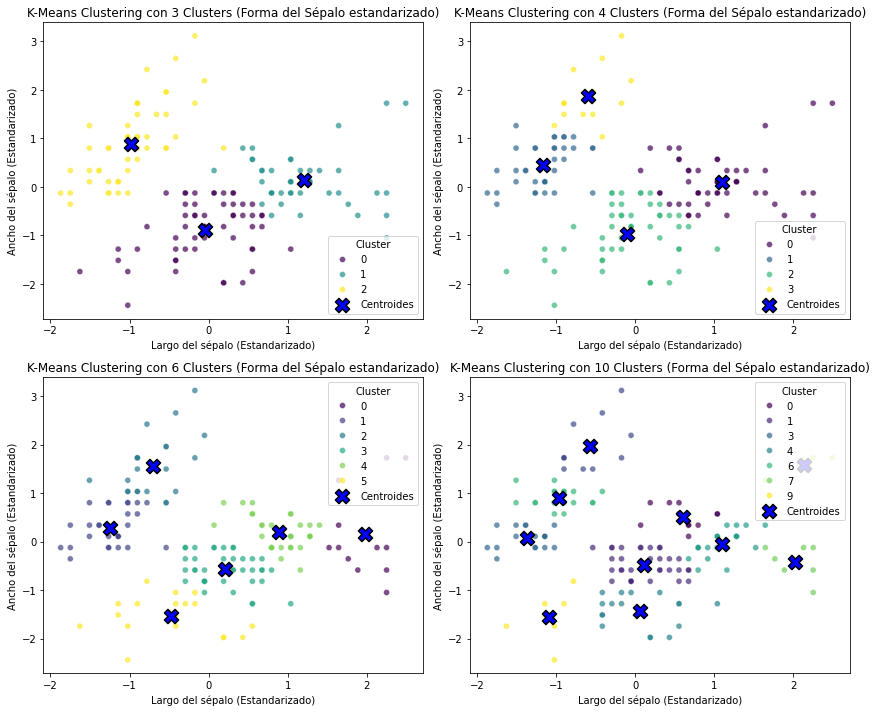

In [63]:

selected_k = [3, 4, 6, 10]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
axes = axes.flatten()  

for i, k in enumerate(selected_k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    standarized_data[f"cluster_{k}"] = kmeans.fit_predict(standarized_data[["sepal_length", "sepal_width"]])

    centroids = kmeans.cluster_centers_

    sns.scatterplot(x=standarized_data["sepal_length"], y=standarized_data["sepal_width"], 
                    hue=standarized_data[f"cluster_{k}"], palette="viridis", alpha=0.7, ax=axes[i])
    axes[i].scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, c="blue", edgecolors="black", linewidths=1.5, label="Centroides")
    axes[i].set_xlabel("Largo del sépalo (Estandarizado)")
    axes[i].set_ylabel("Ancho del sépalo (Estandarizado)")
    axes[i].set_title(f"K-Means Clustering con {k} Clusters (Forma del Sépalo estandarizado)")
    axes[i].legend(title="Cluster")

plt.tight_layout()
plt.show()

### **Comparación de los datos obtenidos con los datos reales**

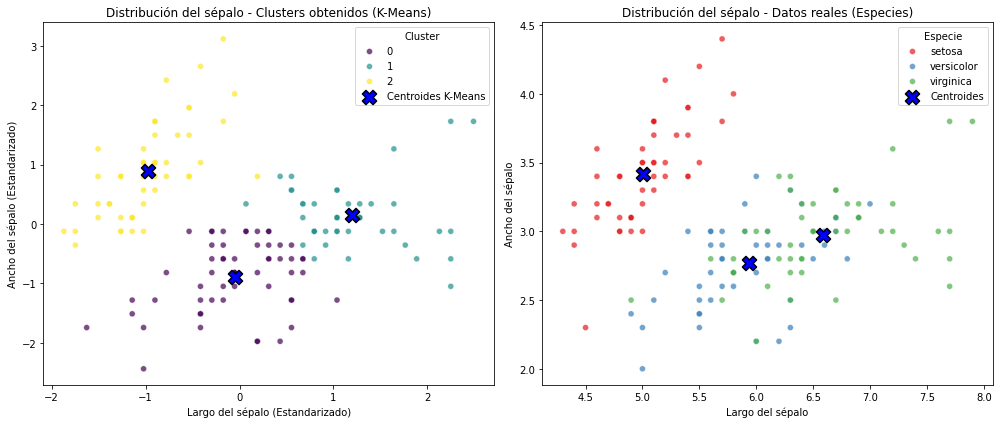

In [64]:
new_data = pd.read_csv("iris-con-respuestas.csv")

# Aplicar K-Means con k=3 (según el resultado que tuvimos utilizando el método del codo)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
standarized_data["cluster_3"] = kmeans.fit_predict(standarized_data[["sepal_length", "sepal_width"]])

#Obtener los centroides para ambos datasets
centroids_kmeans = kmeans.cluster_centers_
species_centroids = new_data.groupby("species")[["sepal_length", "sepal_width"]].mean().values

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graficar los clusters obtenidos con K-Means
sns.scatterplot(x=standarized_data["sepal_length"], y=standarized_data["sepal_width"], 
                hue=standarized_data["cluster_3"], palette="viridis", alpha=0.7, ax=axes[0])

axes[0].scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], marker="X", s=200, c="blue", edgecolors="black", linewidths=1.5, label="Centroides K-Means")
axes[0].set_xlabel("Largo del sépalo (Estandarizado)")
axes[0].set_ylabel("Ancho del sépalo (Estandarizado)")
axes[0].set_title("Distribución del sépalo - Clusters obtenidos (K-Means)")
axes[0].legend(title="Cluster")

# Graficar los datos reales con las especies
sns.scatterplot(x=new_data["sepal_length"], y=new_data["sepal_width"], 
                hue=new_data["species"], palette="Set1", alpha=0.7, ax=axes[1])

axes[1].scatter(species_centroids[:, 0], species_centroids[:, 1], marker="X", s=200, c="blue", edgecolors="black", linewidths=1.5, label="Centroides")
axes[1].set_xlabel("Largo del sépalo")
axes[1].set_ylabel("Ancho del sépalo")
axes[1].set_title("Distribución del sépalo - Datos reales (Especies)")
axes[1].legend(title="Especie")

plt.tight_layout()
plt.show()

In [65]:
# Contar la cantidad de observaciones por cada cluster en los datos obtenidos con K-Means
cluster_counts_kmeans = standarized_data["cluster_3"].value_counts().sort_index()

# Contar la cantidad de observaciones por especie en los datos reales
species_counts_real = new_data["species"].value_counts().sort_index()

cluster_counts_df = pd.DataFrame({"Cluster": cluster_counts_kmeans.index, "Cantidad de Observaciones (K-Means)": cluster_counts_kmeans.values})
species_counts_df = pd.DataFrame({"Especie": species_counts_real.index, "Cantidad de Observaciones (Datos Reales)": species_counts_real.values})


**Contamos la cantidad de observaciones que existen dentro de cada cluster**

In [66]:

cluster_counts_df

,Cluster,Cantidad de Observaciones (K-Means)
0,0,57
1,1,43
2,2,50


**Contamos la cantidad de observaciones que existen dentro de cada grupo de especies**

In [67]:
species_counts_df 

,Especie,Cantidad de Observaciones (Datos Reales)
0,setosa,50
1,versicolor,50
2,virginica,50


El clustering con la forma del sépalo logró identificar tres grupos, lo cual es consistente con la cantidad de especies en los datos reales. Sin embargo, la distribución de observaciones en los clusters no coincide exactamente con la de las especies reales, ya que mientras las especies están balanceadas con 50 observaciones cada una, los clusters presentan ligeras variaciones en sus tamaños (57, 43 y 50 observaciones). Esto indica que, si bien la forma del sépalo aporta información relevante para la clasificación, no es suficiente por sí sola para separar perfectamente las especies.

## **Sección 2**

**Visualización de datos para verificar si se pueden distinguir algunos grupos**

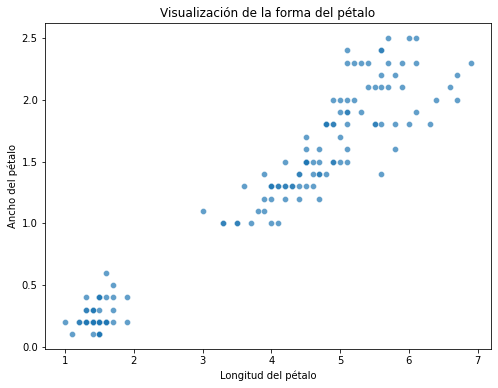

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["petal_length"], y=data["petal_width"], alpha=0.7)
plt.xlabel("Longitud del pétalo")
plt.ylabel("Ancho del pétalo")
plt.title("Visualización de la forma del pétalo")
plt.show()

**Creación de 2 clusters por medio del algoritmo de K-Means Clustering**

Cantidad de puntos en cada cluster:
cluster
0    99
1    51
Name: count, dtype: int64


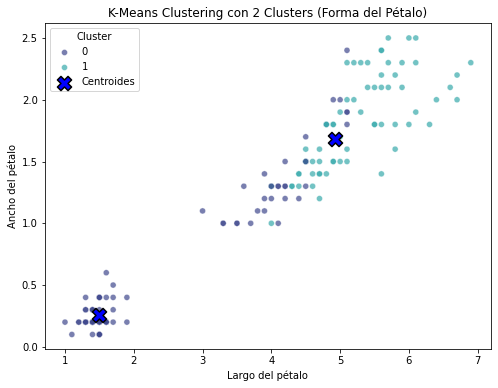

In [69]:

# Modelo de K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(data[["petal_length", "petal_width"]])

# Cantidad de puntos en cada cluster
cluster_counts = data['cluster'].value_counts()
print("Cantidad de puntos en cada cluster:")
print(cluster_counts)

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["petal_length"], y=data["petal_width"], hue=data["cluster_2"], palette="mako", alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, c="blue", edgecolors="black", linewidths=1.5, label="Centroides")  
plt.xlabel("Largo del pétalo")
plt.ylabel("Ancho del pétalo")
plt.title("K-Means Clustering con 2 Clusters (Forma del Pétalo)")
plt.legend(title="Cluster")
plt.show()

**Estandarización  de los datos**

Cantidad de puntos en cada cluster:
cluster
0    99
1    51
Name: count, dtype: int64


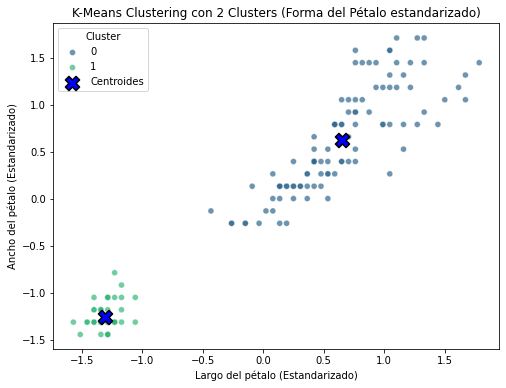

In [70]:

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[["petal_length", "petal_width"]] = scaler.fit_transform(data[["petal_length", "petal_width"]])

# Aplicar K-Means nuevamente con datos estandarizados
kmeans_std = KMeans(n_clusters=2, random_state=42, n_init=10)
data_scaled["cluster_2"] = kmeans_std.fit_predict(data_scaled[["petal_length", "petal_width"]])

# Cantidad de puntos en cada cluster
cluster_counts = data_scaled['cluster'].value_counts()
print("Cantidad de puntos en cada cluster:")
print(cluster_counts)

# Obtener los centroides 
centroids_std = kmeans_std.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled["petal_length"], y=data_scaled["petal_width"], hue=data_scaled["cluster_2"], palette="viridis", alpha=0.7)
plt.scatter(centroids_std[:, 0], centroids_std[:, 1], marker="X", s=200, c="blue", edgecolors="black", linewidths=1.5, label="Centroides")
plt.xlabel("Largo del pétalo (Estandarizado)")
plt.ylabel("Ancho del pétalo (Estandarizado)")
plt.title("K-Means Clustering con 2 Clusters (Forma del Pétalo estandarizado)")
plt.legend(title="Cluster")
plt.show()

Al comparar los resultados del clustering antes y después de la estandarización, observamos que la cantidad de puntos en cada cluster se mantiene igual (99 en el cluster 0 y 51 en el cluster 1), lo que indica que la estructura general de los grupos no cambió. Sin embargo, la estandarización de los datos permite que ambas variables contribuyan equitativamente al cálculo de distancias en K-Means, evitando que una domine sobre la otra. 

**Método del codo**

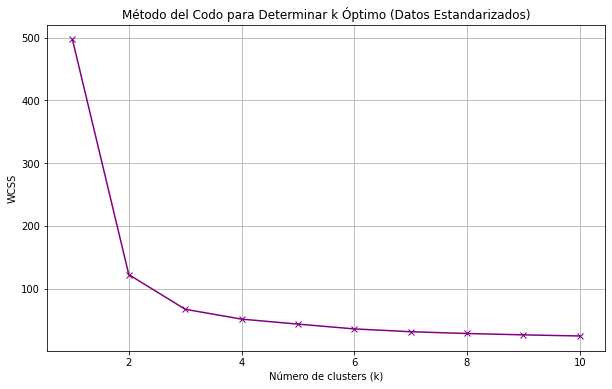

In [ ]:

wcss = []

K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, wcss, marker='x', linestyle='-', color='purple')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para Determinar k Óptimo (Datos Estandarizados)')
plt.grid(True)
plt.show()

El método del codo también indica que el k óptimo para la forma del pétalo son 3 clusters diferentes.

**Gráfico de valores número de clusters**

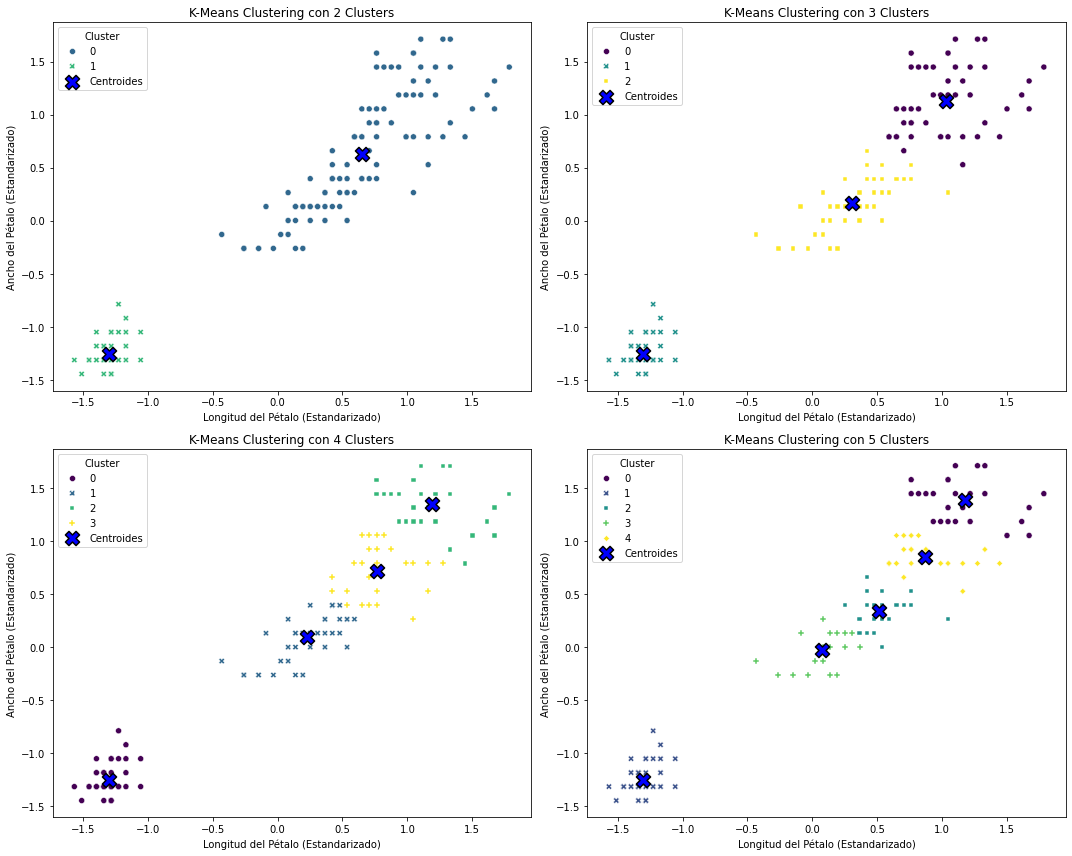

In [72]:
# Convertir a DataFrame para evitar errores al acceder a columnas
data_scaled = pd.DataFrame(data_scaled, columns=["petal_length", "petal_width"])

k_values = [2, 3, 4, 5]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))


for ax, k in zip(axes.flatten(), k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_scaled)
    
    data[f'cluster_{k}'] = clusters  

    centroids = kmeans.cluster_centers_

    sns.scatterplot(x=data_scaled["petal_length"], y=data_scaled["petal_width"], hue=clusters, palette="viridis", ax=ax, style=clusters)

    ax.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, c="blue", edgecolors="black", linewidths=1.5, label="Centroides")

    ax.set_title(f'K-Means Clustering con {k} Clusters')
    ax.set_xlabel('Longitud del Pétalo (Estandarizado)')
    ax.set_ylabel('Ancho del Pétalo (Estandarizado)')
    ax.legend(title="Cluster")

plt.tight_layout()
plt.show()

### **Comparación de los datos obtenidos con los datos reales**

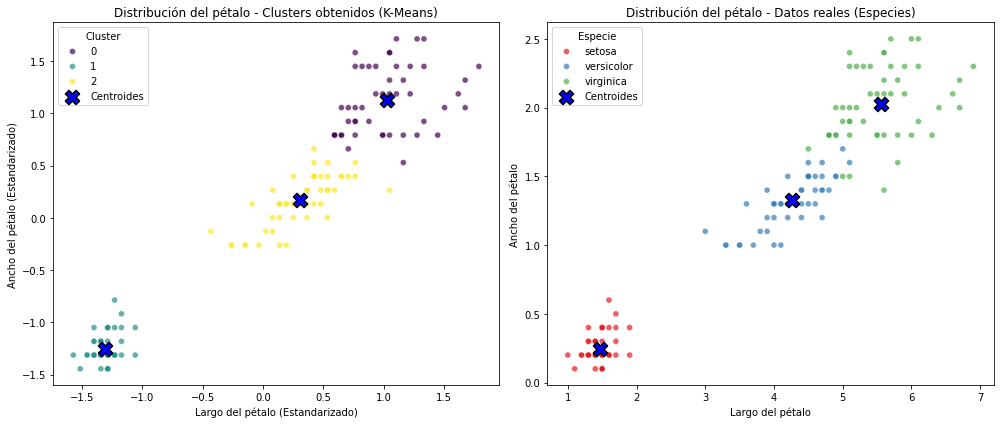

In [73]:

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

if not isinstance(data_scaled, pd.DataFrame):
    data_scaled = pd.DataFrame(data_scaled, columns=["petal_length", "petal_width"])

data_scaled["cluster_3"] = kmeans.fit_predict(data_scaled[["petal_length", "petal_width"]])

# Obtener los centroides para ambos datasets
centroids_kmeans = kmeans.cluster_centers_
species_centroids = new_data.groupby("species")[["petal_length", "petal_width"]].mean().values  

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graficar los clusters obtenidos con K-Means
sns.scatterplot(x=data_scaled["petal_length"], y=data_scaled["petal_width"], 
                hue=data_scaled["cluster_3"], palette="viridis", alpha=0.7, ax=axes[0])

axes[0].scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], 
                marker="X", s=200, c="blue", edgecolors="black", linewidths=1.5, label="Centroides")

axes[0].set_xlabel("Largo del pétalo (Estandarizado)")
axes[0].set_ylabel("Ancho del pétalo (Estandarizado)")
axes[0].set_title("Distribución del pétalo - Clusters obtenidos (K-Means)")
axes[0].legend(title="Cluster")

# Graficar los datos reales con las especies
sns.scatterplot(x=new_data["petal_length"], y=new_data["petal_width"], 
                hue=new_data["species"], palette="Set1", alpha=0.7, ax=axes[1])


axes[1].scatter(species_centroids[:, 0], species_centroids[:, 1], 
                marker="X", s=200, c="blue", edgecolors="black", linewidths=1.5, label="Centroides")

axes[1].set_xlabel("Largo del pétalo")  
axes[1].set_ylabel("Ancho del pétalo")
axes[1].set_title("Distribución del pétalo - Datos reales (Especies)")
axes[1].legend(title="Especie")

plt.tight_layout()
plt.show()

In [74]:
# Contar la cantidad de observaciones por cada cluster en los datos obtenidos con K-Means
cluster_counts_kmeans = data_scaled["cluster_3"].value_counts().sort_index()

# Contar la cantidad de observaciones por especie en los datos reales
species_counts_real = new_data["species"].value_counts().sort_index()

cluster_counts_df = pd.DataFrame({"Cluster": cluster_counts_kmeans.index, "Cantidad de Observaciones (K-Means)": cluster_counts_kmeans.values})
species_counts_df = pd.DataFrame({"Especie": species_counts_real.index, "Cantidad de Observaciones (Datos Reales)": species_counts_real.values})

**Contamos la cantidad de observaciones que existen dentro de cada cluster**

In [75]:
cluster_counts_df

,Cluster,Cantidad de Observaciones (K-Means)
0,0,48
1,1,50
2,2,52


**Contamos la cantidad de observaciones que existen dentro de cada especie**

In [76]:
species_counts_df

,Especie,Cantidad de Observaciones (Datos Reales)
0,setosa,50
1,versicolor,50
2,virginica,50


El clustering basado en la forma del pétalo logró identificar tres grupos con distribuciones de 48, 50 y 52 observaciones, lo que se aproxima bastante a la distribución real de las especies en el dataset original, donde cada una cuenta con 50 observaciones. Esto demuestra que la forma del pétalo es una característica más distintiva para la clasificación en comparación con la forma del sépalo, permitiendo que el algoritmo K-Means agrupe los datos de manera más alineada con las especies reales. 

## **Sección 3**

**Importación de la librería Kneed**

In [77]:

from kneed import KneeLocator

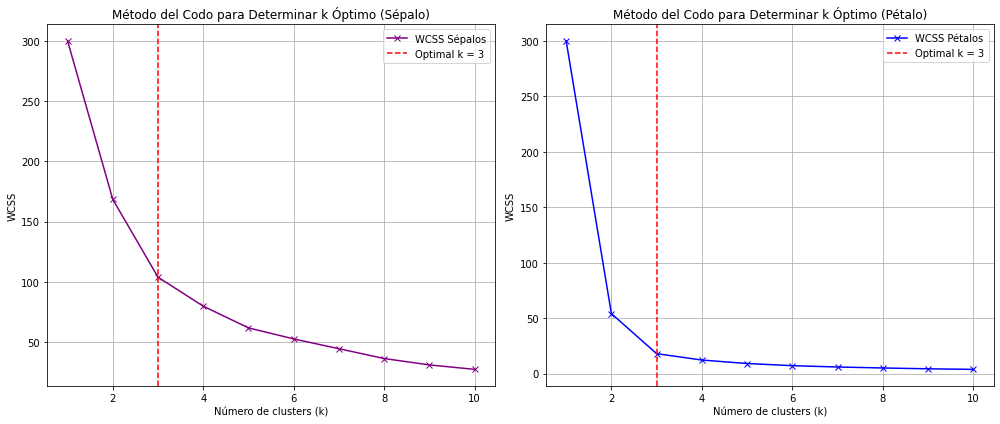

In [78]:

K = range(1, 11)  

# Calcular WCSS para la forma del sépalo
wcss_sepal = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(standarized_data[["sepal_length", "sepal_width"]])
    wcss_sepal.append(kmeans.inertia_)

# Calcular WCSS para la forma del pétalo
wcss_petal = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled[["petal_length", "petal_width"]])
    wcss_petal.append(kmeans.inertia_)

# encontrar el punto de inflexión en ambas variables
kneedle_sepal = KneeLocator(K, wcss_sepal, curve='convex', direction='decreasing')
optimal_k_sepal = kneedle_sepal.elbow

kneedle_petal = KneeLocator(K, wcss_petal, curve='convex', direction='decreasing')
optimal_k_petal = kneedle_petal.elbow


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica del método del codo para la forma del sépalo
axes[0].plot(K, wcss_sepal, marker='x', linestyle='-', color='purple', label='WCSS Sépalos')
axes[0].axvline(x=optimal_k_sepal, color='red', linestyle='--', label=f'Optimal k = {optimal_k_sepal}')
axes[0].set_xlabel('Número de clusters (k)')
axes[0].set_ylabel('WCSS')
axes[0].set_title('Método del Codo para Determinar k Óptimo (Sépalo)')
axes[0].legend()
axes[0].grid(True)

# Gráfica del método del codo para la forma del pétalo
axes[1].plot(K, wcss_petal, marker='x', linestyle='-', color='blue', label='WCSS Pétalos')
axes[1].axvline(x=optimal_k_petal, color='red', linestyle='--', label=f'Optimal k = {optimal_k_petal}')
axes[1].set_xlabel('Número de clusters (k)')
axes[1].set_ylabel('WCSS')
axes[1].set_title('Método del Codo para Determinar k Óptimo (Pétalo)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


Las gráficas muestran que el método del codo utilizando la librería kneed identificó k=3 como el número óptimo de clusters tanto para la forma del sépalo como para la del pétalo. Esto coincide con la cantidad real de especies en el dataset, lo que indica que el clustering fue efectivo en ambos casos. La diferencia en la curvatura de las gráficas se debe a la mayor variabilidad en los valores de los pétalos en comparación con los sépalos, lo que hace que la reducción de WCSS sea más pronunciada en la gráfica del pétalo. 

## **Conclusiones**

- El número óptimo de clusters fue k=3 según el método del codo, tanto manualmente como con la librería kneed, lo que coincide con la cantidad real de especies en el dataset.

- La forma del pétalo permitió una mejor clasificación en comparación con la forma del sépalo, ya que los clusters obtenidos se alinearon más con la distribución real de las especies.

- La estandarización no afectó significativamente la asignación de puntos en cada grupo, pero garantizó que todas las variables tuvieran el mismo peso en el cálculo de distancias, evitando sesgos por diferencias en la escala.

- La elección de características es clave para mejorar la precisión del clustering, ya que el uso de atributos más representativos facilita la separación de los grupos.
